In [1]:
import csv
from scipy.stats import skew
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
import matplotlib.pyplot as plt
import matplotlib

In [2]:
X = np.load('X.npy')
y = np.load('y.npy')
X = X.reshape(571,2,50000)
X.shape

(571, 2, 50000)

In [3]:
phase = X[:,0,:]
charge = X[:,1,:]

In [4]:
phase.shape

(571, 50000)

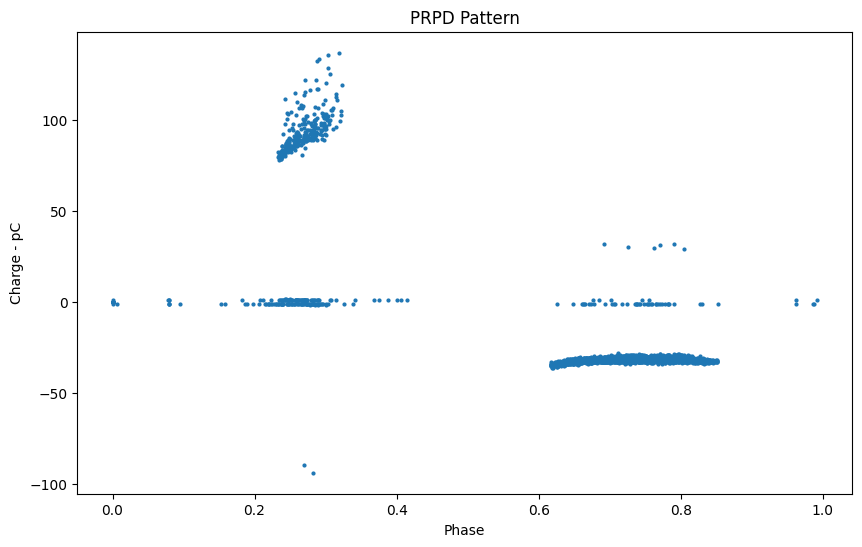

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(phase[150], charge[150], 'o', markersize=2)
plt.title("PRPD Pattern")
# plt.grid(True)
# plt.legend()
plt.xlabel('Phase')
plt.ylabel('Charge - pC')
plt.savefig('figure.png', format='png')
plt.show()

In [9]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import entropy
import openpyxl

dataset = []

myworkbook=openpyxl.Workbook()

worksheet = myworkbook.create_sheet(title="PD")

column = ['n_charge', 'skewness', 'kurtosis', 'mean', 'variance', 'entropy', 'Class']

for i in range(len(column)):
  mycell= worksheet.cell(1, i+1, value = column[i])

for i in range(len(X)):
  current_charge = charge[i]
  out = y[i]
  current_charge = current_charge[current_charge > 0]
  n_charge = len(current_charge)
  skewness = skew(current_charge, axis=0, bias=True)
  kurtos = kurtosis(current_charge, axis=0, bias=True)
  mean = np.mean(current_charge, axis=0)
  variance = np.var(current_charge, axis=0)
  unique, counts = np.unique(current_charge, return_counts=True)
  probabilities = counts / len(current_charge)
  entropi = entropy(probabilities, base=2)
  row = [n_charge, skewness, kurtos, mean, variance, entropi, out]
  # print(row)
  dataset.append(row)
  for j in range(len(row)):
    mycell= worksheet.cell(j+1, i+1, value = row[j])

# myworkbook.save("dataset.xlsx")
dataset = np.array(dataset)

In [10]:
datasetT = dataset.T

In [11]:
datasetT.shape

(7, 571)

In [12]:
first_column = datasetT[0]
normalized_column = (first_column - np.min(first_column)) / (np.max(first_column) - np.min(first_column))
datasetT[0] = normalized_column
print(datasetT)

[[ 9.20306711e-01  9.34306884e-01  9.52614801e-01 ...  2.08645645e-01
   1.98565521e-01  1.90940812e-01]
 [ 5.47143262e-01  5.01204516e-01  4.12524290e-01 ...  1.19514081e+01
   1.11182328e+01  1.08145999e+01]
 [ 3.18132255e-02 -1.47834770e-01 -3.71439025e-02 ...  1.56559490e+02
   1.31047810e+02  1.23513698e+02]
 ...
 [ 1.01439975e-01  9.86886756e-02  7.31041342e-02 ...  4.48554143e+02
   5.37103942e+02  5.15339394e+02]
 [ 9.75154406e+00  9.77313921e+00  9.80089990e+00 ...  9.31313425e+00
   9.33505490e+00  9.34376564e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.00000000e+00
   3.00000000e+00  3.00000000e+00]]


In [16]:
import pandas as pd
import numpy as np
column = ['n_charge', 'skewness', 'kurtosis', 'mean', 'variance', 'entropy', 'Class']
df = pd.DataFrame(datasetT.T, columns=column)
df.iloc[1:] = df.iloc[1:].sample(frac=1).reset_index(drop=True)
output_file = "data_PD.xlsx"
df.to_excel(output_file, index=False, header=True)  # Write with headers

print(f"Data with headers written to {output_file}")

Data with headers written to data_PD.xlsx


In [14]:
import pandas as pd
file_path = 'dst_PD.xlsx'
data = pd.read_excel(file_path)
print(data.head())

   n_charge  skewness  kurtosis      mean  variance   entropy  Class
0  0.920307  0.547143  0.031813  0.527730  0.101440  9.751544      0
1  0.934307  0.501205 -0.147835  0.528931  0.098689  9.773139      0
2  0.952615  0.412524 -0.037144  0.501788  0.073104  9.800900      0
3  0.911691  0.577838  0.100470  0.500457  0.093948  9.738092      0
4  0.956923  0.414923 -0.283548  0.485221  0.068381  9.807355      0
